[🇺🇸](/README.md "English")
[🇨🇳](/README-cn.md "Simplified Chinese")
[🇯🇵](/README-ja.md "Japanese")
[🇮🇹](/README-it.md "Italian")
[🇰🇷](/README-ko.md "Korean")
[🇷🇺](/README-ru.md "Russian")
[🇧🇷](/README-pt.md "Portuguese")
[🇪🇸](/README-es.md "Spanish")

[![license](https://img.shields.io/badge/license-BSD--3--Clause-blue.svg)](https://img.shields.io/badge/license-BSD--3--Clause-blue.svg)

# Introdução

Essa é uma rápida introdução a tecnologia de vídeo para pessoas desenvolvedoras de software. Entretanto, queremos que esse documento seja fácil o suficiente **para qualquer pessoa aprender**. A idéia nasceu de uma [pequena oficina para pessoas interessadas em tecnologia de vídeo](https://docs.google.com/presentation/d/17Z31kEkl_NGJ0M66reqr9_uTG6tI5EDDVXpdPKVuIrs/edit#slide=id.p).

O objetivo principal do documento é introduzir alguns conceitos de vídeo digital utilizando um **vocabulário simples, elementos visuais e exemplos práticos**. Além disso, gostaríamos que esse conhecimento estivesse disponível em qualquer lugar. Por favor, fique à vontade para enviar correções, sugestões e melhorias. 

Haverão exercícios práticos que irão necessitar do **docker instalado** e esse repositório clonado.  

```bash
git clone https://github.com/leandromoreira/digital_video_introduction.git
cd digital_video_introduction
./setup.sh
```
> **ATENCÃO**: quando você ver um comando `./s/ffmpeg` ou `./s/mediainfo`, isso quer dizer que estamos executando uma **versão do programa dentro de um container**, sendo assim, esse programa já possui todas as dependências instaladas e configuradas para sua execução.

Todos os **exercícios práticos devem ser executados da pasta que você clonou originalmente** esse repositório. Para os **exemplos que utilizam Jupyter**, você deve inicializar o servidor utilizando `./s/start_jupyter.sh` e acessar a URL no seu browser.

# Registro de alterações

* Adicionado detalhes sobre sistemas de DRM (Digital Rights Management)
* Versão 1.0.0 lançada 
* Adicionado tradução para chinês simplificado
* Adicionado exemplo de filtro osciloscópio de FFmpeg

# Índice

- [Introdução](#introdução)
- [Índice](#índice)
- [Terminologia Básica](#terminologia-básica)
  * [Outras maneiras de codificar uma imagem em cores](#outras-maneiras-de-codificar-uma-imagem-colorida)
  * [Prática: exercício com imagem e cor](#prática-brincando-com-imagens-e-cores)
  * [DVD é DAR 4:3](#dvd-é-dar-43)
  * [Prática: Verificar propriedades de vídeo](#prática-brincando-com-imagens-e-cores)
- [Remoção de redundância](#remoção-de-redundância)
  * [Cores, Luminância e os nossos olhos](#cores-luminância-e-nossos-olhos)
    + [Modelo de cores](#modelo-de-cor)
    + [Conversão entre YCbCr e RGB](#conversão-entre-ycbcr-e-rgb)
    + [Subamostragem Chroma](#subamostragem-chroma)
    + [Prática: Verifique um histograma YCbCr](#prática-verifique-um-histograma-ycbcr)
  * [Tipos de Frames](#tipos-de-frames)
    + [I frame (intra, keyframe)](#i-frame-intra-keyframe)
    + [P frame (predicted)](#p-frame-predicted)
      - [Prática: Um vídeo com somente um I-frame](#hands-on-a-video-with-a-single-i-frame)
    + [B Frame (bi-predictive)](#b-frame-bi-predictive)
      - [Prática: Compare vídeos com B-frame](#hands-on-compare-videos-with-b-frame)
    + [Sumário](#sumário)
  * [Redundância Temporal (inter prediction)](#redundância-temporal-inter-prediction)
      - [Prática: Veja os vetores de movimento](#prática-veja-os-vetores-de-movimento)
  * [Redundância Espacial (intra prediction)](#redundância-espacial-intra-prediction)
      - [Prática: Verifique intra prediction](#prática-verifique-intra-prediction)
- [Como um codec de vídeo funciona?](#como-um-codec-de-vídeo-funciona)
  * [O quê? Por quê? Como?](#o-quê-por-quê-como)
  * [História](#história)
    + [O nascimento de AV1](#o-nascimento-de-av1)
  * [Um codec genérico](#um-codec-genérico)
  * [Primeiro passo - particionando uma figura](#primeiro-passo-particionando-uma-figura)
    + [Prática: Verifique as partições](#prática-verifique-as-partições)
  * [Segundo passo - previsões](#segundo-passo-previsões)
  * [Terceiro passo - transformação](#terceiro-passo-transformação)
    + [Prática: jogando com diferentes coeficientes](#prática-jogando-com-diferentes-coeficientes)
  * [Quarto passo - quantização](#quartopasso-quantização)
    + [Prática: quantização](#prática-quantização)
  * [Quinto passo - Codificando entropia](#quinto-passo-codificando-entropia)
    + [Código VLC](#código-vlc)
    + [Código Aritmético](#código-aritmético)
    + [Prática: CABAC vs CAVLC](#prática-jogando-com-diferentes-coeficientes)
  * [Sexto passo - formato bitstream](#sexto-passo-formato-bitstream)
    + [H.264 bitstream](#h264-bitstream)
    + [Prática: Inspecionar o H.264 bitstream](#prática-inspecionar-o-h264-bitstream)
  * [Revisão](#revisão)
  * [Como H.265 consegue uma melhor razão de compressão comparado com H.264?](#como-h265-consegue-uma-melhor-razão-de-compressão-comparado-com-h264)
- [Transmissão online](#transmissão-online)
  * [Arquitetura geral](#arquitetura-geral)
  * [Download progressivo e transmissão adaptativa](#download-progressivo-e-transmissão-adaptativa)
  * [Proteção de conteúdo](#proteção-de-conteúdo)
- [Como usar o Jupyter](#como-usar-o-jupyter)
- [Conferências](#conferências)
- [Referências](#referências)

# Terminologia Básica

Uma **imagem** podem ser pensada como uma **matriz 2d**. Se nós começamos a pensar sobre **cores**, podemos extrapolar essa idéia inicial e ver essa imagem como uma **matriz 3d** onde as **dimensões adicionais** são utilizadas para armazenar **informações de cor**.

Se escolhemos representar essas cores com [cores primárias (vermelho, verde and azul)](https://pt.wikipedia.org/wiki/Cor_prim%C3%A1ria), podemos definir três planos: o primeiro plano para o **vermelho**, o segundo para o **verde** e o último para a cor **azul**.

![uma imagem é uma matriz 3D RGB](/i/image_3d_matrix_rgb.png "Uma imagem é uma matriz 3D")

Iremos chamar cada ponto nessa matriz de **um pixel** (picture element). Um pixel representa a **intensidade** (geralmente um valor numérico) de uma dada cor. Por exemplo, um **pixel vermelho** significa 0 de verde, 0 de azul e o máximo de vermelho. O **pixel cor rosa** pode ser formado a partir de uma combinação de três cores. Usando uma representação numérica de 0 até 255, onde o pixel rosa é definido por **Vermelho=255, Verde=192 e Azul=203**.

> #### Outras maneiras de codificar uma imagem colorida
> Muitos outros possíveis modelos podem ser utilizados para representar uma imagem colorida. Nós podemos, por exemplo, utilizar uma paleta indexada de cores, onde um único byte representa cada pixel, ao invés de três bytes quando utilizando o modelo RGB. Em um modelo como esse, podemos utilizar uma matriz 2D ao invés de uma matriz 3D para representar cor. Dessa maneira, nós iremos salvar memória mas teremos potencialmente menos opções de cores.
>
> ![paleta do NES](/i/nes-color-palette.png "Paleta de cores do NES")

Por exemplo, olhe para a figura abaixo. O primeiro rosto ali é totalmente colorido. Os outros rostos são planos vermelho, verde e azul (mostrados em tons de cinza).

![Intensidade de canais de cores RGB](/i/rgb_channels_intensity.png "Intensidade de canais de cores RGB")

Nós podemos ver que a **cor vermelha** será a cor que **contribuíra mais** (as partes mais brilhantes no segundo rosto) para a cor final, enquanto que a contribuição da **cor azul** pode ser vista **mais concentrada nos olhos do Mário** (último rosto) e em algumas partes de suas roupas. Perceba como **todos os planos de cores** (partes escuras) contribuem menos para o **bigode do Mário**.

Cada intensidade de cor requer um determinada quantidade de bits, essa quantidade é chamada de **profundidade de bit**. Digamos que vamos gastar **8 bits** (tendo como valores válidos 0 até 255) por cor (plano), dessa forma, nós temos uma **profundidade de cor** de **24 bits** (8 bits vezes 3 planos RGB). Também podemos inferir que podemos utilizar 2 na 24 (2^24) diferentes cores.

> **É ótimo** para aprender [como uma imagem se transforma em bits](http://www.cambridgeincolour.com/tutorials/camera-sensors.htm).

Uma outra propriedade de uma imagem é a **resolução**, que é basicamente o número de pixels em uma dimensão. É geralmente representada por altura x largura, por exemplo: a imagem **4x4** abaixo:

![resolução da imagem](/i/resolution.png "resolução da imagem")

> #### Prática: brincando com imagens e cores
> Você pode [brincar com imagens e cores](/image_as_3d_array.ipynb) utilizando [jupyter](#how-to-use-jupyter) (python, numpy, matplotlib, etc).
>
> Você também pode aprender [como filtros de imagem (detecção de bordas, nitidez, desfoque...) funcionam](/filters_are_easy.ipynb).

Uma outra propriedade que podemos perceber enquanto trabalhamos com imagens ou vídeo é a **proporção da tela** que descreve um relacionamento proporcional entre altura e largura de uma imagem ou pixel.

Quando as pessoas falam que um filme ou foto é **16x9** geralmente elas estão se referindo ao  **Display Aspect Ratio (DAR)**, entretanto nós também podemos ter diferentes formas de pixels e podemos chamar isso de **Pixel Aspect Ratio (PAR)**.

![display aspect ratio](/i/DAR.png "display aspect ratio")

![pixel aspect ratio](/i/PAR.png "pixel aspect ratio")

> #### DVD é DAR 4:3
> Mesmo que a resolução real de um DVD seja 704x480, a proporção é mantida em 4:3 considerando que esse filme possui PAR de 10:11 (704x10/480x11)

Finalmente, podemos definir um **vídeo** como uma **sucessão de *n* frames** no **tempo** que podemos perceber como uma outra dimensão, onde *n* é a quantidade de quadros por segundo ou frames per second (FPS).

![video](/i/video.png "video")

O número de bits por segundo necessários para exibir um vídeo é sua **taxa de bits**.

> taxa de bits = largura * altura * profundidade de bits * quadros por segundo

Por exemplo, um vídeo com 30 frames por segundo, 24 bits por pixel, resolução de 480x240 necessitará de **82.944.000 bits por segundo** ou 82.944 Mbps (30x480x240x24) se não empregarmos nenhum tipo de compressão.

Quando a **taxa de bits** é quase constante, ela é chamada de taxa de bits constante (**CBR**), mas também pode variar, chamada de taxa de bits variável (**VBR**).

> Este gráfico mostra um VBR restrito que não gasta muitos bits enquanto o quadro é preto.
>
> ![constrained vbr](/i/vbr.png "constrained vbr")

No início, os engenheiros criaram uma técnica para dobrar a taxa de quadros percebida de uma exibição de vídeo **sem consumir largura de banda extra**. Essa técnica é conhecida como **vídeo entrelaçado**; basicamente envia metade da tela em 1 "quadro" e a outra metade no próximo "quadro".

Hoje, as telas são renderizadas principalmente usando a **técnica de varredura progressiva**. Progressivo é uma forma de exibir, armazenar ou transmitir imagens em movimento em que todas as linhas de cada quadro são desenhadas em sequência.

![interlaced vs progressive](/i/interlaced_vs_progressive.png "interlaced vs progressive")

Agora temos uma ideia de como uma **imagem** é representada digitalmente, como suas **cores** são arranjadas, quantos **bits por segundo** gastamos para mostrar um vídeo, se é constante (CBR) ou variável (VBR), com uma determinada **resolução** usando uma determinada **taxa de quadros** e muitos outros termos como entrelaçado, PAR e outros.

> #### Exercício prático: Verifique as propriedades do vídeo
> Você pode [verificar a maioria das propriedades explicadas com ffmpeg ou mediainfo.](https://github.com/leandromoreira/introduction_video_technology/blob/master/encoding_pratical_examples.md#inspect-stream)

# Remoção de redundância

Aprendemos que não é viável usar vídeo sem compressão; **um único vídeo de uma hora** em resolução de 720p com 30fps **requer 278 GB<sup>*</sup>**. Como **usar apenas algoritmos de compactação de dados sem perdas** como DEFLATE (usado em PKZIP, Gzip e PNG), **não** diminuirá suficientemente a largura de banda necessária, precisamos encontrar outras maneiras de compactar o vídeo.

> <sup>*</sup> Encontramos esse número multiplicando 1280 x 720 x 24 x 30 x 3600 (largura, altura, bits por pixel, fps e tempo em segundos)

Para fazer isso, podemos **explorar como nossa visão funciona**. Distinguimos melhor o brilho do que as cores, as **repetições no tempo**, um vídeo contém muitas imagens com poucas alterações, e as **repetições dentro da imagem**, cada quadro também contém muitas áreas usando o mesmo ou cor semelhante.

## Cores, Luminância e nossos olhos

Nossos olhos são [mais sensíveis à luminosidade do que às cores](http://vanseodesign.com/web-design/color-luminance/), você pode testar isso por si mesmo, olhe para essa imagem.

![luminance vs color](/i/luminance_vs_color.png "luminance vs color")

Se você não consegue ver que as cores dos **quadrados A e B são idênticas** no lado esquerdo, tudo bem, é nosso cérebro nos enganando para **prestarmos mais atenção à luz e à escuridão do que à cor**. Há um conector, da mesma cor, no lado direito para que possamos (nosso cérebro) facilmente perceber que, na verdade, são a mesma cor.

> **Explicação simplista de como nossos olhos funcionam**
> O [olho é um órgão complexo](http://www.biologymad.com/nervoussystem/eyenotes.htm), é composto por muitas partes, mas estamos principalmente interessados nas células cones e bastonetes. O olho [contém cerca de 120 milhões de bastonetes e 6 milhões de células cones](https://en.wikipedia.org/wiki/Photoreceptor_cell).
>
> Para **simplificar bastante**, vamos tentar colocar as cores e a luminosidade na função das partes do olho. As **[células bastonetes](https://en.wikipedia.org/wiki/Rod_cell) são principalmente responsáveis pela luminosidade** enquanto as **[células cones](https://en.wikipedia.org/wiki/Cone_cell) são responsáveis pela cor**, existem três tipos de cones, cada um com um pigmento diferente, a saber: [S-cones (azul), M-cones (verde) e L-cones (vermelho)](https://upload.wikimedia.org/wikipedia/commons/1/1e/Cones_SMJ2_E.svg).
>
> Uma vez que temos muitas mais células bastonetes (luminosidade) do que células cones (cor), pode-se inferir que somos mais capazes de distinguir entre claro e escuro do que cores.
>
> ![eyes composition](/i/eyes.jpg "eyes composition")
>
> **Funções de sensibilidade ao contraste**
>
> Pesquisadores da psicologia experimental e muitos outros campos desenvolveram muitas teorias sobre a visão humana. E uma delas é chamada de funções de sensibilidade ao contraste. Elas estão relacionadas ao espaço e ao tempo da luz e seu valor indica, para uma determinada intensidade de luz inicial, quanto mudança é necessária antes que um observador informe que houve uma mudança. Observe o plural da palavra "função", isso ocorre porque podemos medir as funções de sensibilidade ao contraste não apenas em preto e branco, mas também em cores. O resultado desses experimentos mostra que, na maioria dos casos, nossos olhos são mais sensíveis ao brilho do que à cor.

Uma vez que sabemos que somos mais sensíveis à **luma** (a luminosidade em uma imagem), podemos tentar explorá-la.

### Modelo de cor

Aprendemos primeiro [como funcionam as imagens coloridas](#terminologia-básica) usando o **modelo RGB** (consulte terminologia básica), mas existem outros modelos também. Na verdade, existe um modelo que separa a luminância (brilho) da crominância (cores) e é conhecido como YCbCr<sup>*</sup>.

> <sup>*</sup> existem mais modelos que fazem a mesma separação.

Este modelo de cor usa **Y** para representar o brilho e dois canais de cor **Cb** (azul cromático) e **Cr** (vermelho cromático). O [YCbCr](https://en.wikipedia.org/wiki/YCbCr) pode ser derivado do RGB e também pode ser convertido de volta para o RGB. Usando este modelo, podemos criar imagens totalmente coloridas, como podemos ver abaixo.

![ycbcr example](/i/ycbcr.png "ycbcr example")

### Conversão entre YCbCr e RGB

Alguns podem argumentar, como podemos produzir todas as **cores sem usar o verde**?

Para responder a essa pergunta, vamos percorrer uma conversão de RGB para YCbCr. Usaremos os coeficientes do  **[standard BT.601](https://en.wikipedia.org/wiki/Rec._601)** recomendado pelo **[grupo ITU-R<sup>*</sup>](https://en.wikipedia.org/wiki/ITU-R)**. O primeiro passo é **calcular a luminância**, usaremos as constantes sugeridas pelo ITU e substituiremos os valores RGB.

```
Y = 0.299R + 0.587G + 0.114B
```

Uma vez que temos a luminância, podemos **separar as cores** (crominância azul e vermelha):

```
Cb = 0.564(B - Y)
Cr = 0.713(R - Y)
```

E também podemos **convertê-la de volta** e até mesmo obter o **verde usando YCbCr**.

```
R = Y + 1.402Cr
B = Y + 1.772Cb
G = Y - 0.344Cb - 0.714Cr
```

> <sup>*</sup> grupos e padrões são comuns em vídeo digital, eles geralmente definem quais são os padrões, por exemplo, [o que é 4K? qual taxa de quadros devemos usar? resolução? modelo de cores?](https://en.wikipedia.org/wiki/Rec._2020)

Geralmente, **monitores** (monitores, televisores, telas, etc.) utilizam **apenas o modelo RGB**, organizado de maneiras diferentes, veja alguns deles ampliados abaixo:

![pixel geometry](/i/new_pixel_geometry.jpg "pixel geometry")

### Subamostragem Chroma

Com a imagem representada como componentes de luminância e crominância, podemos aproveitar a maior sensibilidade do sistema visual humano para a resolução de luminância em vez de crominância para remover seletivamente informações. A **subamostragem de crominância** é a técnica de codificação de imagens usando **menor resolução para crominância do que para luminância**.


![ycbcr subsampling resolutions](/i/ycbcr_subsampling_resolution.png "ycbcr subsampling resolutions")


Quanto devemos reduzir a resolução de crominância? Descobriu-se que já existem alguns esquemas que descrevem como lidar com a resolução e a combinação (`cor final = Y + Cb + Cr`).

Esses esquemas são conhecidos como sistemas de subamostragem e são expressos como uma razão de 3 partes - `a:x:y` - que define a resolução de crominância em relação a um bloco `a x 2` de pixels de luminância.

 * `a` é a referência de amostragem horizontal (geralmente 4)
 * `x`  é o número de amostras de crominância na primeira linha de pixels `a` (resolução horizontal em relação a `a`)
 * `y` é o número de mudanças de amostras de crominância entre a primeira e a segunda linhas de pixels `a`.

> Uma exceção a isso existe com 4:1:0, que fornece uma única amostra de crominância dentro de cada bloco `4 x 4` de resolução de luma.

Os esquemas comuns usados em codecs modernos são: **4:4:4** (sem subsampling), **4:2:2, 4:1:1, 4:2:0, 4:1:0 e 3:1:1**.

> Você pode acompanhar algumas discussões [para aprender mais sobre a subsampling de crominância](https://github.com/leandromoreira/digital_video_introduction/issues?q=YCbCr).

> **YCbCr 4:2:0 merge**
>
> Aqui está um trecho de uma imagem mesclada usando YCbCr 4:2:0, observe que gastamos apenas 12 bits por pixel.
>
> ![YCbCr 4:2:0 merge](/i/ycbcr_420_merge.png "YCbCr 4:2:0 merge")

Aqui está um trecho de uma imagem mesclada usando YCbCr 4:2:0, observe que gastamos apenas 12 bits por pixel.

Você pode ver a mesma imagem codificada pelos principais tipos de subsampling de croma, as imagens na primeira linha são o YCbCr final, enquanto a última linha de imagens mostra a resolução croma. É realmente uma grande vitória para uma perda tão pequena.

![chroma subsampling examples](/i/chroma_subsampling_examples.jpg "chroma subsampling examples")

Anteriormente, tínhamos calculado que precisávamos de [278GB de armazenamento para manter um arquivo de vídeo com uma hora de resolução 720p e 30fps](#remoção-de-redundância). Se usarmos **YCbCr 4:2:0** podemos **cortar pela metade esse tamanho (139 GB)**<sup>*</sup>, mas ainda está longe do ideal.

> <sup>*</sup> encontramos esse valor multiplicando largura, altura, bits por pixel e fps. Anteriormente, precisávamos de 24 bits, agora precisamos apenas de 12.

<br/>

> ### Prática: Verifique um histograma YCbCr
> Você pode [verificar o histograma YCbCr com o ffmpeg.](/encoding_pratical_examples.md#generates-yuv-histogram) Essa cena tem uma contribuição maior de azul, como mostrado pelo [histograma](https://en.wikipedia.org/wiki/Histogram).
>
> ![ycbcr color histogram](/i/yuv_histogram.png "ycbcr color histogram")

### Cor, luma, luminância, revisão de vídeo gamma

Assista a este incrível vídeo explicando o que é luma e aprenda sobre luminância, gamma e cor.
[![Analog Luma - Uma história e explicação do vídeo](http://img.youtube.com/vi/Ymt47wXUDEU/0.jpg)](http://www.youtube.com/watch?v=Ymt47wXUDEU)

> ### Pratica: Verificar a intensidade do YCbCr
> Você pode visualizar a intensidade do Y para uma determinada linha de um vídeo usando o [filtro osciloscópio do FFmpeg]((https://ffmpeg.org/ffmpeg-filters.html#oscilloscope).).
> ```bash
> ffplay -f lavfi -i 'testsrc2=size=1280x720:rate=30000/1001,format=yuv420p' -vf oscilloscope=x=0.5:y=200/720:s=1:c=1
> ```
> ![y color oscilloscope](/i/ffmpeg_oscilloscope.png "y color oscilloscope")

## Tipos de Frames

Agora podemos prosseguir e tentar eliminar a **redundância temporal**, mas antes disso vamos estabelecer algumas terminologias básicas. Suponha que temos um filme com 30fps, aqui estão seus primeiros 4 quadros.

![ball 1](/i/smw_background_ball_1.png "ball 1") ![ball 2](/i/smw_background_ball_2.png "ball 2") ![ball 3](/i/smw_background_ball_3.png "ball 3")
![ball 4](/i/smw_background_ball_4.png "ball 4")

Podemos ver **muitas repetições** dentro dos quadros, como **o fundo azul,** que não muda do quadro 0 ao quadro 3. Para lidar com esse problema, podemos **categorizá-los abstratamente** em três tipos de quadros.

### I Frame (intra, keyframe)

Um quadro I (referência, chave, intra) é um **quadro autocontido**. Ele não depende de nada para ser renderizado, um quadro I se parece com uma foto estática. O primeiro quadro geralmente é um quadro I, mas veremos quadros I inseridos regularmente entre outros tipos de quadros.

![ball 1](/i/smw_background_ball_1.png "ball 1")

### P Frame (predicted)

Um quadro P (previsão) aproveita o fato de que quase sempre a imagem atual pode ser **renderizada usando o quadro anterior.** Por exemplo, no segundo quadro, a única mudança foi a bola que se moveu para frente. Podemos **reconstruir o quadro 1, usando apenas a diferença e referenciando o quadro anterior**.

![ball 1](/i/smw_background_ball_1.png "ball 1") <-  ![ball 2](/i/smw_background_ball_2_diff.png "ball 2")

> #### Hands-on: A video with a single I-frame
> Já que um quadro P usa menos dados, por que não codificar um [vídeo com apenas um quadro I e todos os outros quadros sendo P?](/encoding_pratical_examples.md#1-i-frame-and-the-rest-p-frames)
>
> Depois de codificar esse vídeo, comece a assisti-lo e faça uma **busca por uma parte avançada** do vídeo, você notará que **leva algum tempo** para realmente ir para essa parte. Isso acontece porque um **quadro P precisa de um quadro de referência** (como um quadro I, por exemplo) para ser renderizado.
>
> Outro teste rápido que você pode fazer é codificar um vídeo usando apenas um quadro I e, em seguida, [codificá-lo inserindo um quadro I a cada 2s](/encoding_pratical_examples.md#1-i-frames-per-second-vs-05-i-frames-per-second) e **verificar o tamanho de cada versão**.

### B Frame (bi-predictive)

E quanto a referenciar quadros passados e futuros para proporcionar uma compressão ainda melhor?! Isso é basicamente o que um quadro B faz.

![ball 1](/i/smw_background_ball_1.png "ball 1") <-  ![ball 2](/i/smw_background_ball_2_diff.png "ball 2") -> ![ball 3](/i/smw_background_ball_3.png "ball 3")

> #### Hands-on: Compare videos with B-frame
> Você pode gerar duas versões, uma com quadros B e outra com [nenhum quadro B](/encoding_pratical_examples.md#no-b-frames-at-all) e verificar o tamanho do arquivo, bem como a qualidade.

### Sumário

Esses tipos de quadros são usados para **proporcionar uma melhor compressão**. Veremos como isso acontece na próxima seção, mas por enquanto podemos pensar que o **quadro I (I-frame) é mais caro enquanto o P é mais barato, mas o mais barato é o quadro B (B-frame).**


![frame types example](/i/frame_types.png "frame types example")

## Redundância Temporal (inter prediction)

Vamos explorar as opções que temos para reduzir as **repetições no tempo**, esse tipo de redundância pode ser resolvido com técnicas de **inter-prediction**.


Vamos tentar **usar menos bits** para codificar a sequência de frames 0 e 1.

![original frames](/i/original_frames.png "original frames")

Uma coisa que podemos fazer é subtração, simplesmente **subtraindo o frame 1 do frame 0**, obtemos apenas o que precisamos para **codificar o residual**.

![delta frames](/i/difference_frames.png "delta frames")

Mas e se eu te disser que há um **método melhor** que usa ainda menos bits?! Primeiro, vamos tratar o `frame 0` como uma coleção de partições bem definidas e, em seguida, tentaremos combinar os blocos do frame 0 no `frame 1`. Podemos pensar nisso como **estimativa de movimento**.

> ### Wikipedia - compensação de movimento por blocos

> "A **compensação de movimento por blocos** divide o quadro atual em blocos não sobrepostos, e o vetor de compensação de movimento **indica de onde esses blocos vêm** (uma crença comum é que o quadro anterior é dividido em blocos não sobrepostos, e os vetores de compensação de movimento indicam para onde esses blocos se movem). Os blocos de origem geralmente se sobrepõem no quadro de origem. Alguns algoritmos de compressão de vídeo montam o quadro atual a partir de peças de vários quadros transmitidos anteriormente."

![delta frames](/i/original_frames_motion_estimation.png "delta frames")

Nós poderíamos estimar que a bola se moveu de `x=0, y=25` para `x=6, y=26`, os valores **x** e **y** são os **vetores de movimento**. Um **passo adicional** que podemos fazer para economizar bits é **codificar apenas a diferença** do vetor de movimento entre a última posição do bloco e a prevista, então o vetor de movimento final seria `x=6 (6-0), y=1 (26-25)`.

> Em uma situação do mundo real, essa **bola seria dividida em n partições** mas o processo é o mesmo.

Os objetos na cena se **movem de forma 3D**, a bola pode ficar menor quando se move para o fundo. É normal que **não encontremos a correspondência perfeita** para o bloco que tentamos encontrar. Aqui está uma visão superposta de nossa estimativa em comparação com a imagem real.

![motion estimation](/i/motion_estimation.png "motion estimation")

Mas podemos ver que quando aplicamos a **estimativa de movimento**, os **dados para codificar são menores** do que quando usamos apenas as técnicas de quadro delta.

![motion estimation vs delta ](/i/comparison_delta_vs_motion_estimation.png "motion estimation delta")

> ### Como seria a compensação de movimento real

> Essa técnica é aplicada a todos os blocos, muitas vezes uma bola seria dividida em mais de um bloco.
>  ![real world motion compensation](/i/real_world_motion_compensation.png "real world motion compensation")
> Fonte: https://web.stanford.edu/class/ee398a/handouts/lectures/EE398a_MotionEstimation_2012.pdf

Você pode [praticar esses conceitos usando o jupyter](/frame_difference_vs_motion_estimation_plus_residual.ipynb).

> #### Prática: Veja os vetores de movimento

> Podemos [gerar um vídeo com a interpolação (vetores de movimento) usando o ffmpeg.](/encoding_pratical_examples.md#generate-debug-video)
>
> ![inter prediction (motion vectors) with ffmpeg](/i/motion_vectors_ffmpeg.png "inter prediction (motion vectors) with ffmpeg")
>
> Ou podemos usar o [Intel Video Pro Analyzer](https://software.intel.com/en-us/intel-video-pro-analyzer) (que é pago, mas há uma versão de teste gratuita que limita você a trabalhar apenas com os primeiros 10 quadros).
>
> ![inter prediction intel video pro analyzer](/i/inter_prediction_intel_video_pro_analyzer.png "inter prediction intel video pro analyzer")

## Redundância Espacial (intra prediction)

Se analisarmos **cada quadro** em um vídeo, veremos que também há **muitas áreas que estão correlacionadas**.

![](/i/repetitions_in_space.png)

Vamos caminhar por um exemplo. Esta cena é composta principalmente por cores azuis e brancas.

![](/i/smw_bg.png)

Este é um `I-frame` e **não podemos usar quadros anteriores** para fazer previsões, mas ainda assim podemos comprimi-lo. Vamos codificar a seleção do bloco vermelho. Se **olharmos para seus vizinhos**, podemos **estimar** que há uma **tendência de cores ao redor dele**.

![](/i/smw_bg_block.png)

Vamos **prever** que o quadro continuará a **espalhar as cores verticalmente**, o que significa que as cores dos pixels **desconhecidos terão os valores de seus vizinhos**.

![](/i/smw_bg_prediction.png)

Nossa **previsão pode estar errada**, por essa razão, precisamos aplicar essa técnica (**intra-prediction**) e depois **subtrair os valores reais**, o que nos dá o bloco residual, resultando em uma matriz muito mais compressível em comparação com a original.

![](/i/smw_residual.png)

Existem muitos tipos diferentes desse tipo de previsão. O que você vê aqui na imagem é uma forma de previsão planar direta, onde os pixels da linha acima do bloco são copiados linha por linha dentro do bloco. A previsão planar também pode envolver um componente angular, onde pixels tanto da esquerda quanto da parte superior são usados para ajudar a prever o bloco atual. E há também a previsão DC, que envolve a média das amostras imediatamente acima e à esquerda do bloco.

> #### Prática: Verifique intra prediction
> Você pode [gerar um vídeo com macroblocos e suas previsões usando o ffmpeg.](/encoding_pratical_examples.md#generate-debug-video) Por favor, verifique a documentação do ffmpeg para entender o [significado de cada cor de bloco](https://trac.ffmpeg.org/wiki/Debug/MacroblocksAndMotionVectors?version=7#AnalyzingMacroblockTypes).
>
> ![intra prediction (macro blocks) with ffmpeg](/i/macro_blocks_ffmpeg.png "inter prediction (motion vectors) with ffmpeg")
>
> Ou podemos usar o [Intel Video Pro Analyzer](https://software.intel.com/en-us/intel-video-pro-analyzer) (que é pago, mas há uma versão de avaliação gratuita que limita você a trabalhar apenas com os primeiros 10 quadros).
>
> ![intra prediction intel video pro analyzer](/i/intra_prediction_intel_video_pro_analyzer.png "intra prediction intel video pro analyzer")

# Como um codec de vídeo funciona?

## O quê? Por quê? Como?

**O quê?** É um software / hardware que comprime ou descomprime vídeo digital. **Por quê?** O mercado e a sociedade exigem vídeos de alta qualidade com largura de banda ou armazenamento limitado. Lembra quando [calculamos a largura de banda necessária](#terminologia-básica) para 30 quadros por segundo, 24 bits por pixel, resolução de um vídeo de 480x240? Era **82,944 Mbps** sem aplicar compressão. É a única maneira de fornecer HD / FullHD / 4K em TVs e na Internet. **Como?** Daremos uma breve olhada nas principais técnicas aqui.

> **CODEC vs Container**
>
> Um erro comum que iniciantes frequentemente cometem é confundir o codec de vídeo digital e o [formato de contêiner de vídeo digital](https://en.wikipedia.org/wiki/Digital_container_format). Podemos pensar em **contêineres** como um formato de invólucro que contém metadados do vídeo (e possivelmente também de áudio), e o **vídeo comprimido** pode ser visto como sua carga útil.
>
> Geralmente, a extensão de um arquivo de vídeo define seu contêiner de vídeo. Por exemplo, o arquivo `video.mp4` provavelmente é um contêiner **[MPEG-4 Part 14](https://en.wikipedia.org/wiki/MPEG-4_Part_14)** e um arquivo chamado `video.mkv` provavelmente é um **[matroska](https://en.wikipedia.org/wiki/Matroska)**. Para ter certeza absoluta sobre o codec e o formato do contêiner, podemos usar o [ffmpeg ou mediainfo](/encoding_pratical_examples.md#inspect-stream).

## História

Antes de entrarmos nos detalhes de funcionamento interno de um codec genérico, vamos dar uma olhada para entender um pouco melhor sobre alguns codecs de vídeo antigos.

O codec de vídeo [H.261](https://en.wikipedia.org/wiki/H.261) nasceu em 1990 (tecnicamente em 1988), e foi projetado para trabalhar com **taxas de dados de 64 kbit/s**. Ele já usava ideias como subsampling de croma, bloco macro, entre outros. No ano de 1995, o padrão de codec de vídeo **H.263** foi publicado e continuou a ser estendido até 2001.

Em 2003, a primeira versão do **H.264/AVC** foi concluída. No mesmo ano, a **On2 Technologies** (anteriormente conhecida como Duck Corporation) lançou seu codec de vídeo como uma compressão de vídeo **lossy** e **livre de royalties** chamada **VP3**. Em 2008, o **Google comprou** esta empresa, lançando o **VP8** no mesmo ano. Em dezembro de 2012, o Google lançou o **VP9** e é **suportado por aproximadamente ¾ do mercado de navegadores** (incluindo mobile).

**[AV1](https://en.wikipedia.org/wiki/AOMedia_Video_1)** é um novo codec de vídeo **livre de royalties** e de código aberto que está sendo projetado pela [Alliance for Open Media (AOMedia)](http://aomedia.org/), que é composta por **empresas como Google, Mozilla, Microsoft, Amazon, Netflix, AMD, ARM, NVidia, Intel e Cisco**, entre outras. A **primeira versão** 0.1.0 do codec de referência foi **publicada em 7 de abril de 2016**.

![codec history timeline](/i/codec_history_timeline.png "codec history timeline")

> #### O nascimento de AV1
>
> No momento do início de 2015, a Google estava trabalhando no [VP10](https://en.wikipedia.org/wiki/VP9#Successor:_from_VP10_to_AV1), a Xiph (Mozilla) estava trabalhando no [Daala](https://xiph.org/daala/) e a Cisco havia disponibilizado como software livre seu codec de vídeo livre de royalties chamado [Thor](https://tools.ietf.org/html/draft-fuldseth-netvc-thor-03).
>
> Então a MPEG LA anunciou pela primeira vez limites anuais para o HEVC (H.265) e taxas oito vezes mais altas que a do H.264, mas logo em seguida eles mudaram as regras novamente:
> * **sem limite anual**,
> * **taxa de conteúdo** (0,5% da receita) e
> * **taxas por unidade cerca de 10 vezes mais altas que o h264**.
>
> O [alliance for open media](http://aomedia.org/about/) foi criada por empresas fabricantes de hardware (Intel, AMD, ARM, Nvidia, Cisco), fornecedoras de conteúdo (Google, Netflix, Amazon), mantenedoras de navegadores (Google, Mozilla) e outras.
> As empresas tinham um objetivo comum, um codec de vídeo sem royalties e então nasceu o AV1 com uma [licença de patente muito mais simples](http://aomedia.org/license/patent/). **Timothy B. Terriberry** fez uma apresentação incrível, que é a fonte desta seção, sobre a [concepção, modelo de licença e estado atual do AV1](https://www.youtube.com/watch?v=lzPaldsmJbk).
>
> Você ficará surpreso ao saber que pode **analisar o codec AV1 pelo seu navegador**, acesse https://arewecompressedyet.com/analyzer/
>
> ![av1 browser analyzer](/i/av1_browser_analyzer.png "av1 browser analyzer")
>
> PS: Se você quiser saber mais sobre a história dos codecs, é preciso aprender o básico por trás das [patentes de compressão de vídeo](https://www.vcodex.com/video-compression-patents/).

## Um codec genérico

Vamos apresentar os **principais mecanismos por trás de um codec de vídeo genérico**, mas a maioria desses conceitos são úteis e usados em codecs modernos, como VP9, AV1 e HEVC. Certifique-se de entender que vamos simplificar MUITO as coisas. Às vezes, usaremos um exemplo real (principalmente H.264) para demonstrar uma técnica.

## Primeiro passo - particionando uma figura

O primeiro passo é **dividir o quadro** em várias **partições, subpartições** e além.

![picture partitioning](/i/picture_partitioning.png "picture partitioning")

**Mas por quê?** Existem muitas razões, por exemplo, quando dividimos a imagem, podemos trabalhar com previsões mais precisas, usando partições menores para as partes móveis menores, enquanto usamos partições maiores para um fundo estático.

Geralmente, os CODECs **organizam essas partições** em fatias (ou azulejos), macroblocos (ou unidades de árvore de codificação) e muitas subpartições. O tamanho máximo dessas partições varia, o HEVC define 64x64 enquanto o AVC usa 16x16, mas as subpartições podem atingir tamanhos de 4x4.

Lembra que aprendemos como são **tipos de quadros**?! Bem, você pode **aplicar essas ideias a blocos** também, portanto podemos ter I-Slice, B-Slice, I-Macroblock e etc.

> ### Prática: Verifique as partições
> Também podemos usar o [Intel Video Pro Analyzer](https://software.intel.com/en-us/intel-video-pro-analyzer) (que é pago, mas há uma versão de teste gratuita que limita você a trabalhar apenas com os primeiros 10 quadros). Aqui estão as partições [VP9 analisadas](/encoding_pratical_examples.md#transcoding).
>
> ![VP9 partitions view intel video pro analyzer ](/i/paritions_view_intel_video_pro_analyzer.png "VP9 partitions view intel video pro analyzer")

## Segundo passo - previsões

Uma vez que temos as partições, podemos fazer previsões sobre elas. Para a [predição inter](#redundância-temporal-inter-prediction), precisamos **enviar os vetores de movimento e o residual** e para a [predição intra](#redundância-espacial-intra-prediction), nós **enviaremos a direção da predição e o residual** também.

## Terceiro passo - transformação

Depois de obtermos o bloco residual (`partição prevista - partição real`), podemos **transformá-lo** de uma maneira que nos permite saber quais **pixels podemos descartar** enquanto mantemos a **qualidade geral**. Existem algumas transformações para esse comportamento exato.

Embora existam [outras transformações](https://en.wikipedia.org/wiki/List_of_Fourier-related_transforms#Discrete_transforms), vamos olhar mais de perto a transformada discreta de cosseno (DCT). As principais características da [**DCT**](https://en.wikipedia.org/wiki/Discrete_cosine_transform) são:

* **converte** blocos de **pixels** em blocos do mesmo tamanho de **coeficientes de frequência**.
* **compacta** energia, tornando fácil eliminar a redundância espacial.
* é **reversível**, ou seja, você pode voltar para os pixels.

> Em 2 de fevereiro de 2017, Cintra, R. J. e Bayer, F. M publicaram seu artigo [DCT-like Transform for Image Compression Requires 14 Additions Only](https://arxiv.org/abs/1702.00817).

Não se preocupe se você não entendeu os benefícios de cada ponto, tentaremos fazer alguns experimentos para ver o valor real disso.

Vamos pegar o seguinte **bloco de pixels** (8x8):

![pixel values matrix](/i/pixel_matrice.png "pixel values matrix")

Que renderiza a seguinte imagem de bloco (8x8):

![pixel values matrix](/i/gray_image.png "pixel values matrix")

Quando **aplicamos a DCT** a este bloco de pixels, obtemos o **bloco de coeficientes** (8x8):

![coefficients values](/i/dct_coefficient_values.png "coefficients values")

E se renderizarmos este bloco de coeficientes, obteremos esta imagem:

![dct coefficients image](/i/dct_coefficient_image.png "dct coefficients image")

Como você pode ver, não se parece em nada com a imagem original, podemos perceber que o **primeiro coeficiente** é muito diferente de todos os outros. Este primeiro coeficiente é conhecido como coeficiente DC que representa **todas as amostras** na matriz de entrada, algo **semelhante a uma média**.

Este bloco de coeficientes tem uma propriedade interessante que é separar os componentes de alta frequência dos de baixa frequência.

![dct frequency coefficients property](/i/dctfrequ.jpg "dct frequency coefficients property")

Em uma imagem, a **maior parte da energia** estará concentrada nas [**frequências mais baixas**](https://web.archive.org/web/20150129171151/https://www.iem.thm.de/telekom-labor/zinke/mk/mpeg2beg/whatisit.htm), então se transformarmos uma imagem em seus componentes de frequência e **descartarmos os coeficientes de frequência mais alta**, podemos **reduzir a quantidade de dados** necessários para descrever a imagem sem sacrificar muito a qualidade da imagem.

> frequência significa quão rápido um sinal está mudando

Vamos tentar aplicar o conhecimento que adquirimos no teste convertendo a imagem original para sua frequência (bloco de coeficientes) usando a DCT e depois descartando parte dos coeficientes menos importantes.

Primeiro, convertemos para o seu **domínio de frequência**.

![coefficients values](/i/dct_coefficient_values.png "coefficients values")

Em seguida, descartamos parte (67%) dos coeficientes, principalmente a parte inferior direita.

![zeroed coefficients](/i/dct_coefficient_zeroed.png "zeroed coefficients")

Finalmente, reconstruímos a imagem a partir deste bloco de coeficientes descartados (lembre-se, precisa ser reversível) e comparamos com o original.

![original vs quantized](/i/original_vs_quantized.png "original vs quantized")

Como podemos ver, a imagem resultante se assemelha à imagem original, mas apresenta muitas diferenças em relação à mesma. Jogamos **fora 67,1875%** e ainda conseguimos algo semelhante ao original. Poderíamos descartar os coeficientes de forma mais inteligente para obter uma melhor qualidade de imagem, mas esse é o próximo tópico.

> **Cada coeficiente é formado usando todos os pixels**
>
> É importante observar que cada coeficiente não mapeia diretamente para um único pixel, mas é uma soma ponderada de todos os pixels. Este gráfico incrível mostra como o primeiro e o segundo coeficiente são calculados, usando pesos únicos para cada índice.
>
> ![dct calculation](/i/applicat.jpg "dct calculation")
>
> Fonte: https://web.archive.org/web/20150129171151/https://www.iem.thm.de/telekom-labor/zinke/mk/mpeg2beg/whatisit.htm
>
> Você também pode tentar [visualizar a DCT observando a formação de uma imagem simples](/dct_better_explained.ipynb) na base da DCT. Por exemplo, aqui está o [caractere A sendo formado](https://en.wikipedia.org/wiki/Discrete_cosine_transform#Example_of_IDCT) usando o peso de cada coeficiente.
>
> ![](https://upload.wikimedia.org/wikipedia/commons/5/5e/Idct-animation.gif )




<br/>

> ### Prática: jogando com diferentes coeficientes
> Você pode experimentar com a [transformação DCT](/uniform_quantization_experience.ipynb).

## Quarto passo - quantização

Quando descartamos alguns dos coeficientes, na última etapa (transformação), de alguma forma fizemos uma forma de quantização. Nessa etapa, escolhemos perder informações (a parte **perdida**) ou, em termos simples, **quantizamos os coeficientes para alcançar a compressão**.

Como podemos quantizar um bloco de coeficientes? Um método simples seria uma quantização uniforme, em que pegamos um bloco, **dividimos por um único valor** (10) e arredondamos esse valor.

![quantize](/i/quantize.png "quantize")

Como podemos **reverter** (re-quantizar) esse bloco de coeficientes? Podemos fazer isso **multiplicando o mesmo valor** (10) que dividimos primeiro.

![re-quantize](/i/re-quantize.png "re-quantize")

Essa **abordagem não é a melhor** porque não leva em conta a importância de cada coeficiente, poderíamos usar uma **matriz de quantizadores** em vez de um único valor. Essa matriz pode explorar a propriedade da DCT, quantizando a maior parte do canto inferior direito e menos o canto superior esquerdo, a [JPEG usa uma abordagem semelhante](https://www.hdm-stuttgart.de/~maucher/Python/MMCodecs/html/jpegUpToQuant.html), você pode verificar o [código-fonte para ver essa matriz](https://github.com/google/guetzli/blob/master/guetzli/jpeg_data.h#L40).

> ### Prática: quantização
> Você pode experimentar [quantização](/dct_experiences.ipynb).

## Quinto passo - Codificando entropia

Depois de quantizarmos os dados (blocos/fatias/quadros de imagem), ainda podemos comprimi-los de forma lossless. Existem muitas maneiras (algoritmos) de comprimir dados. Vamos experimentar brevemente alguns deles, para uma compreensão mais profunda, você pode ler o incrível livro [Understanding Compression: Data Compression for Modern Developers](https://www.amazon.com/Understanding-Compression-Data-Modern-Developers/dp/1491961538/).

### Código VLC:

Vamos supor que temos uma sequência dos símbolos: **a**, **e**, **r** e **t** e sua probabilidade (de 0 a 1) é representada por esta tabela.


|             | a   | e   | r    | t   |
|-------------|-----|-----|------|-----|
| probabilidade | 0.3 | 0.3 | 0.2 |  0.2 |

Podemos atribuir códigos binários exclusivos (preferencialmente pequenos) para os símbolos mais prováveis e códigos maiores para os menos prováveis.

|             | a   | e   | r    | t   |
|-------------|-----|-----|------|-----|
| probabilidade | 0.3 | 0.3 | 0.2 | 0.2 |
| código binário | 0 | 10 | 110 | 1110 |

Vamos comprimir a sequência **eat**, assumindo que gastaríamos 8 bits para cada símbolo, gastaríamos **24 bits*8 sem qualquer compressão. Mas, se substituirmos cada símbolo por seu código, podemos economizar espaço.

O primeiro passo é codificar o símbolo **e** que é `10` e o segundo símbolo é **a** que é adicionado (não de uma maneira matemática) `[10][0]` e, finalmente, o terceiro símbolo **t**, que faz com que nosso bitstream comprimido final seja `[10][0][1110]` ou `1001110`, que requer apenas **7 bits** (3.4 vezes menos espaço que o original).

Observe que cada código deve ser um código prefixado único [Huffman pode ajudá-lo a encontrar esses números](https://en.wikipedia.org/wiki/Huffman_coding). Embora tenha alguns problemas, existem [codecs de vídeo que ainda oferecem](https://en.wikipedia.org/wiki/Context-adaptive_variable-length_coding) esse método e é o algoritmo para muitas aplicações que requerem compressão.

Tanto o codificador quanto o decodificador **precisam saber** a tabela de símbolos com seus códigos, portanto, você também precisa enviar a tabela.

### Código Aritmético:

Vamos supor que temos um fluxo de símbolos: **a**, **e**, **r**, **s** e **t** e suas probabilidades são representadas por esta tabela.

|             | a   | e   | r    | s    | t   |
|-------------|-----|-----|------|------|-----|
| probabilidade | 0.3 | 0.3 | 0.15 | 0.05 | 0.2 |

Com essa tabela em mente, podemos construir intervalos contendo todos os símbolos possíveis classificados pelos mais frequentes.

![initial arithmetic range](/i/range.png "initial arithmetic range")

Agora vamos codificar a sequência **eat**, escolhemos o primeiro símbolo **e**, que está dentro da subfaixa **0,3 a 0,6** (mas não incluso) e pegamos essa subfaixa e a dividimos novamente usando as mesmas proporções usadas antes, mas dentro dessa nova faixa.

![second sub range](/i/second_subrange.png "second sub range")

Continuando a codificar nossa sequência **eat**, agora pegamos o segundo símbolo **a**, que está dentro da nova subfaixa **0,3 a 0,39**, e depois pegamos nosso último símbolo **t** e fazemos o mesmo processo novamente e obtemos a última subfaixa **0,354 a 0,372**.

![final arithmetic range](/i/arithimetic_range.png "final arithmetic range")

Agora precisamos escolher um número dentro da última subfaixa **0,354 a 0,372**, vamos escolher **0,36**, mas poderíamos escolher qualquer número dentro dessa subfaixa. Com **apenas** esse número, seremos capazes de recuperar nossa sequência original **eat**. Se você pensar sobre isso, é como se estivéssemos desenhando uma linha dentro de faixas de faixas para codificar nossa sequência.

![final range traverse](/i/range_show.png "final range traverse")

O **processo reverso** (também conhecido como decodificação) é igualmente fácil, com nosso número **0,36** e nossa faixa original, podemos executar o mesmo processo, mas agora usando esse número para revelar o fluxo codificado por trás desse número.

Com a primeira faixa, percebemos que nosso número se encaixa na fatia, portanto, é o nosso primeiro símbolo, agora dividimos essa subfaixa novamente, fazendo o mesmo processo anterior e perceberemos que **0,36** se encaixa no símbolo **a** e depois de repetirmos o processo, chegamos ao último símbolo **t** (formando nosso fluxo codificado original *eat*).

Tanto o codificador quanto o decodificador **devem conhecer** a tabela de probabilidade de símbolos, portanto, você precisa enviar a tabela.

Bastante legal, não é? As pessoas são muito inteligentes para criar uma solução dessas, alguns [codecs de vídeo usam](https://en.wikipedia.org/wiki/Context-adaptive_binary_arithmetic_coding) essa técnica (ou pelo menos a oferecem como uma opção).

A ideia é comprimir sem perda o fluxo de bits quantizado, com certeza este artigo está perdendo toneladas de detalhes, razões, compensações e etc. Mas [você deve aprender mais](https://www.amazon.com/Understanding-Compression-Data-Modern-Developers/dp/1491961538/) como desenvolvedor. Novos codecs estão tentando usar diferentes [algoritmos de codificação de entropia como ANS.](https://en.wikipedia.org/wiki/Asymmetric_Numeral_Systems)

> ### Prática: CABAC vs CAVLC
> Você pode [gerar dois fluxos, um com CABAC e outro com CAVLC](https://github.com/leandromoreira/introduction_video_technology/blob/master/encoding_pratical_examples.md#cabac-vs-cavlc) e **comparar o tempo** que cada um leva para ser gerado, bem como **o tamanho final**.

## Sexto passo - formato bitstream

Depois de termos concluído todas essas etapas, precisamos **empacotar os quadros comprimidos e o contexto dessas etapas**. Precisamos informar explicitamente ao decodificador sobre **as decisões tomadas pelo codificador**, como profundidade de bits, espaço de cores, resolução, informações de previsões (vetores de movimento, direção de previsão intra), perfil, nível, taxa de quadros, tipo de quadro, número de quadros e muito mais.

Vamos estudar superficialmente o bitstream H.264. Nosso primeiro passo é [gerar um bitstream H.264 mínimo <sup>*</sup>](/encoding_pratical_examples.md#generate-a-single-frame-h264-bitstream), podemos fazer isso usando nosso próprio repositório e [ffmpeg](http://ffmpeg.org/).

```
./s/ffmpeg -i /files/i/minimal.png -pix_fmt yuv420p /files/v/minimal_yuv420.h264
```

> <sup>*</sup> Por padrão, o ffmpeg adiciona todos os parâmetros de codificação como um **NAL SEI**, em breve definiremos o que é um NAL.

Este comando irá gerar um bitstream H.264 bruto com um **único quadro**, 64x64, com espaço de cor yuv420 e usando a seguinte imagem como quadro.

> ![used frame to generate minimal h264 bitstream](/i/minimal.png "used frame to generate minimal h264 bitstream")

### H.264 bitstream

O padrão AVC (H.264) define que as informações serão enviadas em **macro quadros** (no sentido de rede), chamados de **[NAL](https://en.wikipedia.org/wiki/Network_Abstraction_Layer)** (Camada de Abstração de Rede). O principal objetivo do NAL é fornecer uma representação de vídeo "amigável à rede", este padrão deve funcionar em TVs (baseadas em fluxo), na Internet (baseadas em pacotes) e em outros.

![NAL units H.264](/i/nal_units.png "NAL units H.264")

Existe um **[marcador de sincronização](https://en.wikipedia.org/wiki/Frame_synchronization)** para definir os limites das unidades NAL. Cada marcador de sincronização contém o valor `0x00 0x00 0x01`, exceto o primeiro, que é `0x00 0x00 0x00 0x01`. Se executarmos o **hexdump** no bitstream h264 gerado, podemos identificar pelo menos três NALs no início do arquivo.

![synchronization marker on NAL units](/i/minimal_yuv420_hex.png "synchronization marker on NAL units")

Como já dissemos antes, o decodificador precisa saber não apenas os dados da imagem, mas também os detalhes do vídeo, quadro, cores, parâmetros usados e outros. O **primeiro byte** de cada NAL define sua categoria e **tipo**.

| id tipo NAL  | Descrição  |
|---  |---|
| 0  |  Indefinido |
| 1  |  Fatia codificada de uma imagem não-IDR |
| 2  |  Dados de fatia codificada, partição A |
| 3  |  Dados de fatia codificada, partição B |
| 4  |  Dados de fatia codificada, partição C |
| 5  |  **IDR** Fatia codificada de uma imagem IDR |
| 6  |  **SEI** Informação adicional de melhoria |
| 7  |  **SPS** Conjunto de parâmetros de sequência |
| 8  |  **PPS** Conjunto de parâmetros de imagem |
| 9  |  Delimitador de unidade de acesso |
| 10 |  Fim da sequência |
| 11 |  Fim do fluxo |
| ... |  ... |

Geralmente, o primeiro NAL de um fluxo de bits é um **SPS**, esse tipo de NAL é responsável por informar as variáveis gerais de codificação como **perfil**, **nível**, **resolução** e outras.

Se pulamos o primeiro marcador de sincronização, podemos decodificar o **primeiro byte** para saber qual **tipo de NAL** é o primeiro.

Por exemplo, o primeiro byte após o marcador de sincronização é `01100111`, onde o primeiro bit (`0`) é para o campo **forbidden_zero_bit**, os próximos 2 bits (`11`) nos dizem o campo `nal_ref_idc` que indica se este NAL é um campo de referência ou não e os próximos 5 bits (`00111`) nos informam o campo **nal_unit_type**, neste caso, é um NAL de **SPS** (7).

O segundo byte (`binário=01100100, hex=0x64, dec=100`) de um SPS NAL é o campo **profile_idc** que mostra o perfil que o codificador usou, neste caso, usamos o **[perfil alto](https://en.wikipedia.org/wiki/H.264/MPEG-4_AVC#Profiles)**. O terceiro byte também contém várias flags que determinam o perfil exato (como restrito ou progressivo). Mas, no nosso caso, o terceiro byte é 0x00 e, portanto, o codificador usou apenas o perfil alto.

![SPS binary view](/i/minimal_yuv420_bin.png "SPS binary view")

Quando lemos a especificação do bitstream H.264 para um SPS NAL, encontramos muitos valores para o **nome do parâmetro**, **categoria** e uma **descrição**, por exemplo, vamos olhar para os campos `pic_width_in_mbs_minus_1` e `pic_height_in_map_units_minus_1`.

| Nome do parâmetro  | Categoria  |  Descrição w  |
|---  |---|---|
| pic_width_in_mbs_minus_1 |  0 | ue(v) |
| pic_height_in_map_units_minus_1 |  0 | ue(v) |

> **ue(v)**: Inteiro sem sinal (unsigned integer) [Exp-Golomb-coded](https://ghostarchive.org/archive/JBwdI)

Se fizermos algumas contas com o valor desses campos, acabaremos com a **resolução*8. Podemos representar um `1920 x 1080` usando um `pic_width_in_mbs_minus_1` com o valor de `119 ( (119 + 1) * macroblock_size = 120 * 16 = 1920)`, economizando espaço, em vez de codificar `1920`, fizemos isso com `119`.

Se continuarmos a examinar nosso vídeo criado com uma visualização binária (ex: `xxd -b -c 11 v/minimal_yuv420.h264`), podemos pular para o último NAL que é o quadro em si.

![h264 idr slice header](/i/slice_nal_idr_bin.png "h264 idr slice header")

Podemos ver seus primeiros 6 bytes: `01100101 10001000 10000100 00000000 00100001 11111111`. Como já sabemos, o primeiro byte nos informa sobre o tipo de NAL que é, neste caso, (`00101`) é um **IDR Slice (5)** e podemos inspecioná-lo ainda mais:


![h264 slice header spec](/i/slice_header.png "h264 slice header spec")

Usando as informações da especificação, podemos decodificar qual tipo de slice (**slice_type**), o número do quadro (**frame_num**) entre outros campos importantes.

Para obter os valores de alguns campos (`ue(v), me(v), se(v) ou te(v)`), precisamos decodificá-los usando um decodificador especial chamado [Exponential-Golomb](https://ghostarchive.org/archive/JBwdI), este método é **muito eficiente para codificar valores variáveis**, principalmente quando há muitos valores padrão.

> Os valores de **slice_type** e **frame_num** deste vídeo são 7 (I slice) e 0 (o primeiro quadro).

Podemos ver o **bitstream como um protocolo**, e se você quiser ou precisar aprender mais sobre esse bitstream, consulte a [especificação ITU H.264](http://www.itu.int/rec/T-REC-H.264-201610-I). Aqui está um diagrama macro que mostra onde os dados da imagem (YUV comprimido) residem.

![h264 bitstream macro diagram](/i/h264_bitstream_macro_diagram.png "h264 bitstream macro diagram")

Podemos explorar outros bitstreams como o [VP9 bitstream](https://storage.googleapis.com/downloads.webmproject.org/docs/vp9/vp9-bitstream-specification-v0.6-20160331-draft.pdf), [H.265 (HEVC)](http://handle.itu.int/11.1002/1000/11885-en?locatt=format:pdf) ou até mesmo nosso **novo melhor amigo** [**AV1** bitstream](https://medium.com/@mbebenita/av1-bitstream-analyzer-d25f1c27072b#.d5a89oxz8
), [eles parecem semelhantes? Não](http://www.gpac-licensing.com/2016/07/12/vp9-av1-bitstream-format/), mas uma vez que você aprende um, pode facilmente aprender os outros.


> ### Prática: Inspecionar o H.264 bitstream
> Podemos [gerar um vídeo de um único quadro](https://github.com/leandromoreira/introduction_video_technology/blob/master/encoding_pratical_examples.md#generate-a-single-frame-video) e usar o [mediainfo](https://en.wikipedia.org/wiki/MediaInfo) para inspecionar seu bitstream H.264. Na verdade, você pode até ver o [código fonte que analisa o bitstream h264 (AVC)](https://github.com/MediaArea/MediaInfoLib/blob/master/Source/MediaInfo/Video/File_Avc.cpp).
>
> ![mediainfo details h264 bitstream](/i/mediainfo_details_1.png "mediainfo details h264 bitstream")
>
> Também podemos usar o [Intel Video Pro Analyzer](https://software.intel.com/en-us/intel-video-pro-analyzer), que é pago, mas há uma versão de teste gratuita que limita o uso apenas aos primeiros 10 quadros, mas isso é ok para fins de aprendizado.
>
> ![intel video pro analyzer details h264 bitstream](/i/intel-video-pro-analyzer.png "intel video pro analyzer details h264 bitstream")

## Revisão

Vamos notar que muitos dos **codecs modernos usam o mesmo modelo que aprendemos**. Na verdade, vamos olhar o diagrama de blocos do codec de vídeo Thor, ele contém todos os passos que estudamos. A ideia é que agora você deve ser capaz de entender melhor as inovações e os artigos para a área.

![thor_codec_block_diagram](/i/thor_codec_block_diagram.png "thor_codec_block_diagram")

Anteriormente, calculamos que precisávamos de [139 GB de armazenamento para manter um arquivo de vídeo com uma hora de duração em resolução 720p e 30fps](#chroma-subsampling) se usarmos as técnicas que aprendemos aqui, como **previsão inter e intra, transformação, quantização, codificação de entropia e outras** podemos alcançar, assumindo que estamos gastando **0,031 bit por pixel**, o mesmo vídeo de qualidade perceptível **requer apenas 367,82 MB em vez de 139 GB** de armazenamento.

> Escolhemos usar **0,031 bit por pixel** com base no exemplo de vídeo fornecido aqui.

## Como H.265 consegue uma melhor razão de compressão comparado com H.264?

Agora que sabemos mais sobre como os codecs funcionam, fica fácil entender como os novos codecs são capazes de entregar resoluções mais altas com menos bits.

Vamos comparar AVC e HEVC, lembrando que quase sempre é um equilíbrio entre mais ciclos de CPU (complexidade) e taxa de compressão.

HEVC tem opções de **partições** (e **sub-partições**) maiores e mais numerosas do que AVC, mais **direções/ângulos de predições intra**, codificação de entropia melhorada e muito mais, todas essas melhorias tornaram o H.265 capaz de comprimir 50% mais do que o H.264.

![h264 vs h265](/i/avc_vs_hevc.png "H.264 vs H.265")

# Transmissão online
## Arquitetura geral

![general architecture](/i/general_architecture.png "general architecture")

[TODO]

## Download progressivo e transmissão adaptativa

![progressive download](/i/progressive_download.png "progressive download")

![adaptive streaming](/i/adaptive_streaming.png "adaptive streaming")

[TODO]

## Proteção de conteúdo

Podemos utilizar **um sistema simples de token** para proteger o conteúdo. O usuário sem um token tenta solicitar um vídeo e o CDN o impede, enquanto um usuário com um token válido pode reproduzir o conteúdo. Isso funciona de maneira bastante semelhante à maioria dos sistemas de autenticação da web.

![token protection](/i/token_protection.png "token_protection")

O uso exclusivo deste sistema de tokens ainda permite que um usuário baixe um vídeo e o distribua. Então, os sistemas de **gerenciamento de direitos digitais (DRM)** podem ser usados para tentar evitar isso.

![drm](/i/drm.png "drm")

Na vida real, em sistemas de produção, as pessoas frequentemente usam ambas as técnicas para fornecer autorização e autenticação.

### DRM
#### Principais sistemas

* FPS - [**FairPlay Streaming**](https://developer.apple.com/streaming/fps/)
* PR - [**PlayReady**](https://www.microsoft.com/playready/)
* WV - [**Widevine**](http://www.widevine.com/)


#### O que?

DRM significa [gerenciamento de direitos digitais](https://sander.saares.eu/categories/drm-is-not-a-black-box/), é uma **forma de fornecer proteção de direitos autorais para mídia digital**, como vídeo e áudio digital. Embora seja usado em muitos lugares, [não é universalmente aceito](https://en.wikipedia.org/wiki/Digital_rights_management#DRM-free_works).

#### Por quê?

Os criadores de conteúdo (principalmente estúdios) querem proteger sua propriedade intelectual contra cópias para evitar redistribuição não autorizada de mídia digital.

#### Como?

Vamos descrever de forma abstrata e genérica uma forma simplificada de DRM.

Dado um **conteúdo C1** (ou seja, um streaming de vídeo hls ou dash), com um **reprodutor P1** (como shaka-clappr, exo-player ou ios) em um **dispositivo D1** (como um smartphone, TV, tablet ou desktop/notebook) usando um **sistema DRM1** (widevine, playready ou FairPlay).

O conteúdo C1 é criptografado com uma **chave simétrica K1** do sistema DRM1, gerando o **conteúdo criptografado C'1**.

![drm general flow](/i/drm_general_flow.jpeg "drm general flow")

O reprodutor P1, de um dispositivo D1, tem duas chaves (assimétricas), uma **chave privada PRK1** (essa chave é protegida<sup>1</sup> e conhecida apenas por D1) e uma **chave pública PUK1**.


> **<sup>1</sup>protegida**: essa proteção pode ser **via hardware**, por exemplo, essa chave pode ser armazenada dentro de um chip especial (somente leitura) que funciona como uma [caixa preta](https://en.wikipedia.org/wiki/Black_box) para fornecer a decodificação, ou **por software** (menos seguro), o sistema DRM fornece meios para saber qual tipo de proteção um determinado dispositivo possui.


Quando o **reprodutor P1 deseja reproduzir** o **conteúdo C'1**, ele precisa lidar com o **sistema DRM1**, fornecendo sua chave pública **PUK1**. O sistema DRM1 retorna a **chave K1 criptografada** com a chave pública do cliente **PUK1**. Em teoria, essa resposta é algo que **apenas D1 é capaz de decifrar**.

`K1P1D1 = enc(K1, PUK1)`

**P1** usa seu sistema local de DRM pode ser um [SOC](https://en.wikipedia.org/wiki/System_on_a_chip), um hardware ou software especializado, este sistema é capaz de decifrar o conteúdo usando sua chave privada PRK1, ele pode decifrar **a chave simétrica K1 do K1P1D1** e **reproduzir C'1**. No melhor dos casos, as chaves não são expostas através da RAM.

 ```
 K1 = dec(K1P1D1, PRK1)

 P1.play(dec(C'1, K1))
 ```

![drm decoder flow](/i/drm_decoder_flow.jpeg "drm decoder flow")

# Como user o Jupyter

Certifique-se de ter o **docker instalado** e execute `./s/start_jupyter.sh` e siga as instruções no terminal.

# Conferências

* [DEMUXED](https://demuxed.com/) - você pode [ver as apresentações dos últimos 2 eventos.](https://www.youtube.com/channel/UCIc_DkRxo9UgUSTvWVNCmpA).

# Referências

O conteúdo mais rico está aqui, é onde todas as informações que vimos neste texto foram extraídas, baseadas ou inspiradas. Você pode aprofundar seu conhecimento com esses incríveis links, livros, vídeos, etc.

Cursos Onlines e Tutoriais:

* https://www.coursera.org/learn/digital/
* https://people.xiph.org/~tterribe/pubs/lca2012/auckland/intro_to_video1.pdf
* https://xiph.org/video/vid1.shtml
* https://xiph.org/video/vid2.shtml
* https://wiki.multimedia.cx
* https://mahanstreamer.net
* http://slhck.info/ffmpeg-encoding-course
* http://www.cambridgeincolour.com/tutorials/camera-sensors.htm
* http://www.slideshare.net/vcodex/a-short-history-of-video-coding
* http://www.slideshare.net/vcodex/introduction-to-video-compression-13394338
* https://developer.android.com/guide/topics/media/media-formats.html
* http://www.slideshare.net/MadhawaKasun/audio-compression-23398426
* http://inst.eecs.berkeley.edu/~ee290t/sp04/lectures/02-Motion_Compensation_girod.pdf

Livros:

* https://www.amazon.com/Understanding-Compression-Data-Modern-Developers/dp/1491961538/ref=sr_1_1?s=books&ie=UTF8&qid=1486395327&sr=1-1
* https://www.amazon.com/H-264-Advanced-Video-Compression-Standard/dp/0470516925
* https://www.amazon.com/High-Efficiency-Video-Coding-HEVC/dp/3319068946
* https://www.amazon.com/Practical-Guide-Video-Audio-Compression/dp/0240806301/ref=sr_1_3?s=books&ie=UTF8&qid=1486396914&sr=1-3&keywords=A+PRACTICAL+GUIDE+TO+VIDEO+AUDIO
* https://www.amazon.com/Video-Encoding-Numbers-Eliminate-Guesswork/dp/0998453005/ref=sr_1_1?s=books&ie=UTF8&qid=1486396940&sr=1-1&keywords=jan+ozer

Em material de integração:

* https://github.com/Eyevinn/streaming-onboarding
* https://howvideo.works/
* https://www.aws.training/Details/eLearning?id=17775
* https://www.aws.training/Details/eLearning?id=17887
* https://www.aws.training/Details/Video?id=24750

Especificações de fluxo de bits:

* http://www.itu.int/rec/T-REC-H.264-201610-I
* http://www.itu.int/ITU-T/recommendations/rec.aspx?rec=12904&lang=en
* https://storage.googleapis.com/downloads.webmproject.org/docs/vp9/vp9-bitstream-specification-v0.6-20160331-draft.pdf
* http://iphome.hhi.de/wiegand/assets/pdfs/2012_12_IEEE-HEVC-Overview.pdf
* http://phenix.int-evry.fr/jct/doc_end_user/current_document.php?id=7243
* http://gentlelogic.blogspot.com.br/2011/11/exploring-h264-part-2-h264-bitstream.html
* https://forum.doom9.org/showthread.php?t=167081
* https://forum.doom9.org/showthread.php?t=168947

Programas:

* https://ffmpeg.org/
* https://ffmpeg.org/ffmpeg-all.html
* https://ffmpeg.org/ffprobe.html
* https://mediaarea.net/en/MediaInfo
* https://www.jongbel.com/
* https://trac.ffmpeg.org/wiki/
* https://software.intel.com/en-us/intel-video-pro-analyzer
* https://medium.com/@mbebenita/av1-bitstream-analyzer-d25f1c27072b#.d5a89oxz8

Codecs não-ITU:

* https://aomedia.googlesource.com/
* https://github.com/webmproject/libvpx/tree/master/vp9
* https://ghostarchive.org/archive/0W0d8 (era: https://people.xiph.org/~xiphmont/demo/daala/demo1.shtml)* https://people.xiph.org/~jm/daala/revisiting/
* https://www.youtube.com/watch?v=lzPaldsmJbk
* https://fosdem.org/2017/schedule/event/om_av1/
* https://jmvalin.ca/papers/AV1_tools.pdf

Conceitos de Codificação:

* http://x265.org/hevc-h265/
* http://slhck.info/video/2017/03/01/rate-control.html
* http://slhck.info/video/2017/02/24/vbr-settings.html
* http://slhck.info/video/2017/02/24/crf-guide.html
* https://arxiv.org/pdf/1702.00817v1.pdf
* https://trac.ffmpeg.org/wiki/Debug/MacroblocksAndMotionVectors
* http://web.ece.ucdavis.edu/cerl/ReliableJPEG/Cung/jpeg.html
* http://www.adobe.com/devnet/adobe-media-server/articles/h264_encoding.html
* https://prezi.com/8m7thtvl4ywr/mp3-and-aac-explained/
* https://blogs.gnome.org/rbultje/2016/12/13/overview-of-the-vp9-video-codec/
* https://videoblerg.wordpress.com/2017/11/10/ffmpeg-and-how-to-use-it-wrong/

Sequências de vídeo para testes:

* http://bbb3d.renderfarming.net/download.html
* https://www.its.bldrdoc.gov/vqeg/video-datasets-and-organizations.aspx

Diversos:

* https://github.com/Eyevinn/streaming-onboarding
* http://stackoverflow.com/a/24890903
* http://stackoverflow.com/questions/38094302/how-to-understand-header-of-h264
* http://techblog.netflix.com/2016/08/a-large-scale-comparison-of-x264-x265.html
* http://vanseodesign.com/web-design/color-luminance/
* http://www.biologymad.com/nervoussystem/eyenotes.htm
* http://www.compression.ru/video/codec_comparison/h264_2012/mpeg4_avc_h264_video_codecs_comparison.pdf
* https://web.archive.org/web/20100728070421/http://www.csc.villanova.edu/~rschumey/csc4800/dct.html (era: http://www.csc.villanova.edu/~rschumey/csc4800/dct.html)
* http://www.explainthatstuff.com/digitalcameras.html
* http://www.hkvstar.com
* http://www.hometheatersound.com/
* http://www.lighterra.com/papers/videoencodingh264/
* http://www.red.com/learn/red-101/video-chroma-subsampling
* http://www.slideshare.net/ManoharKuse/hevc-intra-coding
* http://www.slideshare.net/mwalendo/h264vs-hevc
* http://www.slideshare.net/rvarun7777/final-seminar-46117193
* http://www.springer.com/cda/content/document/cda_downloaddocument/9783642147029-c1.pdf
* http://www.streamingmedia.com/Articles/Editorial/Featured-Articles/A-Progress-Report-The-Alliance-for-Open-Media-and-the-AV1-Codec-110383.aspx
* http://www.streamingmediaglobal.com/Articles/ReadArticle.aspx?ArticleID=116505&PageNum=1
* http://yumichan.net/video-processing/video-compression/introduction-to-h264-nal-unit/
* https://cardinalpeak.com/blog/the-h-264-sequence-parameter-set/
* https://cardinalpeak.com/blog/worlds-smallest-h-264-encoder/
* https://codesequoia.wordpress.com/category/video/
* https://developer.apple.com/library/content/technotes/tn2224/_index.html
* https://en.wikibooks.org/wiki/MeGUI/x264_Settings
* https://en.wikipedia.org/wiki/Adaptive_bitrate_streaming
* https://en.wikipedia.org/wiki/AOMedia_Video_1
* https://en.wikipedia.org/wiki/Chroma_subsampling#/media/File:Colorcomp.jpg
* https://en.wikipedia.org/wiki/Cone_cell
* https://en.wikipedia.org/wiki/File:H.264_block_diagram_with_quality_score.jpg
* https://en.wikipedia.org/wiki/Inter_frame
* https://en.wikipedia.org/wiki/Intra-frame_coding
* https://en.wikipedia.org/wiki/Photoreceptor_cell
* https://en.wikipedia.org/wiki/Pixel_aspect_ratio
* https://en.wikipedia.org/wiki/Presentation_timestamp
* https://en.wikipedia.org/wiki/Rod_cell
* https://it.wikipedia.org/wiki/File:Pixel_geometry_01_Pengo.jpg
* https://leandromoreira.com.br/2016/10/09/how-to-measure-video-quality-perception/
* https://sites.google.com/site/linuxencoding/x264-ffmpeg-mapping
* https://softwaredevelopmentperestroika.wordpress.com/2014/02/11/image-processing-with-python-numpy-scipy-image-convolution/
* https://tools.ietf.org/html/draft-fuldseth-netvc-thor-03
* https://www.encoding.com/android/
* https://www.encoding.com/http-live-streaming-hls/
* https://web.archive.org/web/20150129171151/https://www.iem.thm.de/telekom-labor/zinke/mk/mpeg2beg/whatisit.htm
* https://www.lifewire.com/cmos-image-sensor-493271
* https://www.linkedin.com/pulse/brief-history-video-codecs-yoav-nativ
* https://www.linkedin.com/pulse/video-streaming-methodology-reema-majumdar
* https://www.vcodex.com/h264avc-intra-precition/
* https://www.youtube.com/watch?v=9vgtJJ2wwMA
* https://www.youtube.com/watch?v=LFXN9PiOGtY
* https://www.youtube.com/watch?v=Lto-ajuqW3w&list=PLzH6n4zXuckpKAj1_88VS-8Z6yn9zX_P6
* https://www.youtube.com/watch?v=LWxu4rkZBLw
* https://web.stanford.edu/class/ee398a/handouts/lectures/EE398a_MotionEstimation_2012.pdf
* https://sander.saares.eu/categories/drm-is-not-a-black-box/

# Prática: brincando com imagens e cores
Você pode brincar com imagens e cores utilizando jupyter (python, numpy, matplotlib, etc).

Você também pode aprender como filtros de imagem (detecção de bordas, nitidez, desfoque...) funcionam.

Uma outra propriedade que podemos perceber enquanto trabalhamos com imagens ou vídeo é a proporção da tela que descreve um relacionamento proporcional entre altura e largura de uma imagem ou pixel.

Quando as pessoas falam que um filme ou foto é 16x9 geralmente elas estão se referindo ao Display Aspect Ratio (DAR), entretanto nós também podemos ter diferentes formas de pixels e podemos chamar isso de Pixel Aspect Ratio (PAR).

R intensity at x=3, y=3 is 7
G intensity at x=3, y=3 is 71
B intensity at x=3, y=3 is 129


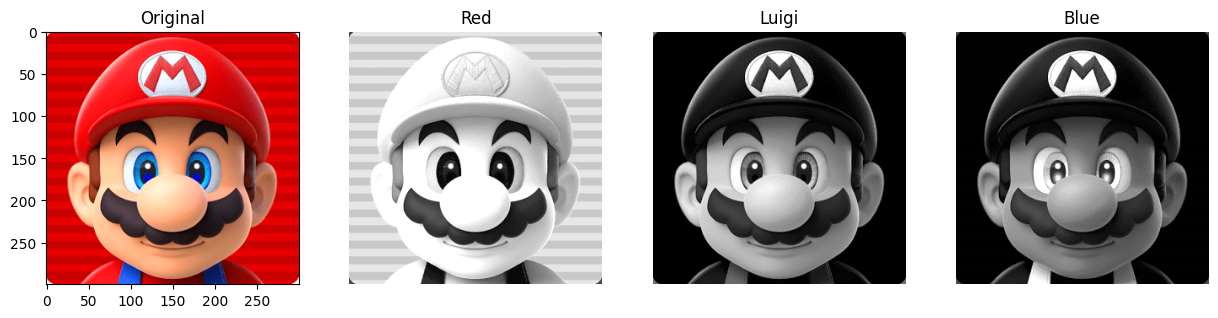

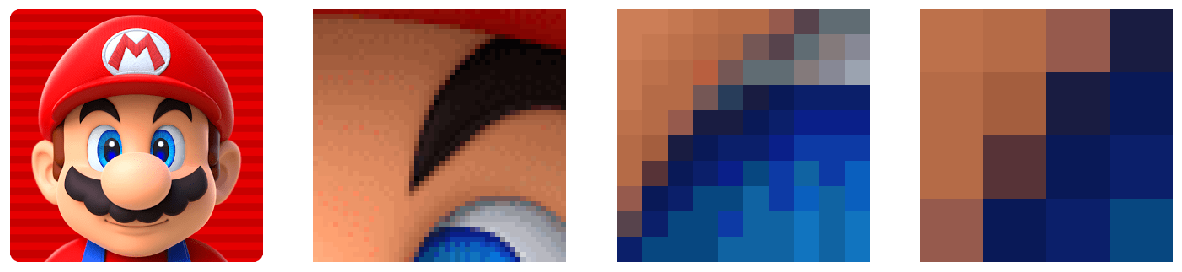

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# loading image
img = mpimg.imread('super_mario_head.png')
# creates sub plots of 15x15
f, (plt1, plt2, plt3, plt4) = plt.subplots(1, 4, figsize=(15, 15))

plt1.set_title('Original'); plt1.imshow(img);
# showing each channel img[x,y,color_plane] 
plt2.axis('off'); plt2.set_title('Red'); plt2.imshow(img[:,:,0], cmap='gray');
plt3.axis('off'); plt3.set_title('Luigi'); plt3.imshow(img[:,:,1], cmap='gray');
plt4.axis('off'); plt4.set_title('Blue'); plt4.imshow(img[:,:,2], cmap='gray');
# creates sub plots of 15x15
f, (plt1, plt2, plt3, plt4) = plt.subplots(1, 4, figsize=(15, 15))

# cutting the image
eye_brow = img[100:150, 150:200,]
eye_split = eye_brow[40:50, 20:30]
zoomed_eye_split = eye_split[4:8, 0:4]

plt1.axis('off'); plt1.imshow(img, interpolation='nearest');
plt2.axis('off'); plt2.imshow(eye_brow, interpolation='nearest');
plt3.axis('off'); plt3.imshow(eye_split, interpolation='nearest');
plt4.axis('off'); plt4.imshow(zoomed_eye_split, interpolation='nearest');
latest_pixel = zoomed_eye_split[3, 3]
print("R intensity at x=3, y=3 is",round(256 * latest_pixel[0]))
print("G intensity at x=3, y=3 is",round(256 * latest_pixel[1]))
print("B intensity at x=3, y=3 is",round(256 * latest_pixel[2]))

# Exercício prático: Verifique as propriedades do vídeo
Você pode verificar a maioria das propriedades explicadas com ffmpeg ou mediainfo.
# Para adicionar a biblioteca ffmpeg no windows faça o seguinte:
## Faça o dowload do ffmpeg no site https://github.com/BtbN/FFmpeg-Builds/releases/download/latest/ffmpeg-master-latest-win64-gpl.zip
após o download extrait e adicionar as variaveis do sistema
![variaveis do sistema](/i/variaveis.png "variaveis do sistema")
```

# Prática: Verifique um histograma YCbCr
Você pode verificar o histograma YCbCr com o ffmpeg. Essa cena tem uma contribuição maior de azul, como mostrado pelo histograma.

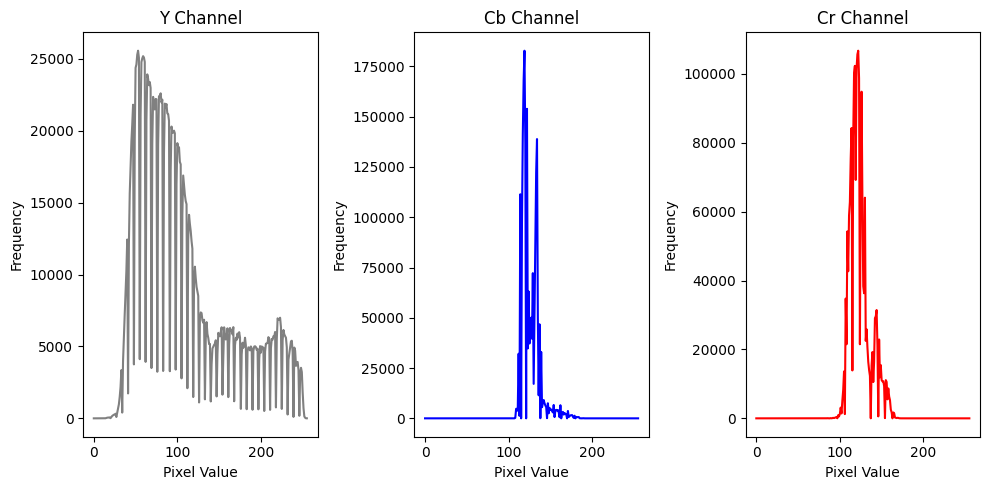

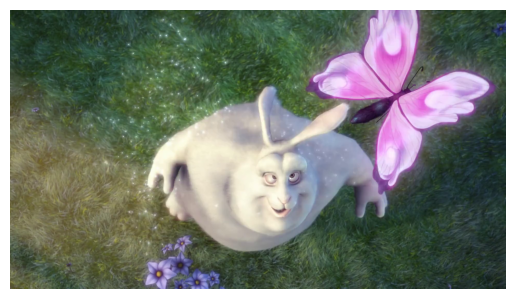

In [8]:
import cv2
import matplotlib.pyplot as plt



# Load the video
cap = cv2.VideoCapture("https://github.com/leandromoreira/digital_video_introduction/raw/master/v/small_bunny_1080p_30fps.mp4")

# Read the first frame
ret, frame = cap.read()

# Convert the frame to PNG format
cv2.imwrite("frame.png", frame, [cv2.IMWRITE_PNG_COMPRESSION, 0])

# Release the video capture
cap.release()


# Load the video frame
frame = cv2.imread("frame.png")

# Convert the frame to YCbCr color space
frame_ycrcb = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)

# Split the channels
y, cb, cr = cv2.split(frame_ycrcb)

# Calculate the histograms
hist_y = cv2.calcHist([y], [0], None, [256], [0, 256])
hist_cb = cv2.calcHist([cb], [0], None, [256], [0, 256])
hist_cr = cv2.calcHist([cr], [0], None, [256], [0, 256])

# Plot the histograms
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.plot(hist_y, color='gray')
plt.title('Y Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.subplot(132)
plt.plot(hist_cb, color='blue')
plt.title('Cb Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.subplot(133)
plt.plot(hist_cr, color='red')
plt.title('Cr Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
import matplotlib.pyplot as plt
# Load the image
image = cv2.imread("frame.png")

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# Pratica: Verificar a intensidade do YCbCr
Você pode visualizar a intensidade do Y para uma determinada linha de um vídeo usando o filtro osciloscópio do FFmpeg.

ffplay -f lavfi -i 'testsrc2=size=1280x720:rate=30000/1001,format=yuv420p' -vf oscilloscope=x=0.5:y=200/720:s=1:c=1
![Intensidade do YCbCr](intensidadedoYCbCr.jpeg)




# Sexto passo - formato bitstream (H.264)
Depois de termos concluído todas essas etapas, precisamos empacotar os quadros comprimidos e o contexto dessas etapas. Precisamos informar explicitamente ao decodificador sobre as decisões tomadas pelo codificador, como profundidade de bits, espaço de cores, resolução, informações de previsões (vetores de movimento, direção de previsão intra), perfil, nível, taxa de quadros, tipo de quadro, número de quadros e muito mais.

Exemplo de codificação de entropia com ffmpeg (h264) no terminal do windows a partir de uma imagem png (minimal.png) e gerando um bitstream h264 (minimal_yuv420.h264)
ffmpeg -i minimal.png -pix_fmt yuv420p minimal_yuv420.h264 

exemplo de codificação de entropia com ffmpeg (h264) no terminal do windows a partir de uma imagem png (minimal.png) e gerando um minimal_yuv420.mp4 (minimal_yuv420.mp4)
ffmpeg -i minimal.png -pix_fmt yuv420p minimal_yuv420.mp4
fmpeg -i minimal.png  minimal_yuv444.mp4

# we can inspect h264 bitstream
mediainfo --Details minimal_yuv420.mp4  | less ˋˋˋ

# Hands-on: A video with a single I-frame
Já que um quadro P usa menos dados, por que não codificar um vídeo com apenas um quadro I e todos os outros quadros sendo P?

Depois de codificar esse vídeo, comece a assisti-lo e faça uma busca por uma parte avançada do vídeo, você notará que leva algum tempo para realmente ir para essa parte. Isso acontece porque um quadro P precisa de um quadro de referência (como um quadro I, por exemplo) para ser renderizado.

Outro teste rápido que você pode fazer é codificar um vídeo usando apenas um quadro I e, em seguida, codificá-lo inserindo um quadro I a cada 2s e verificar o tamanho de cada versão.

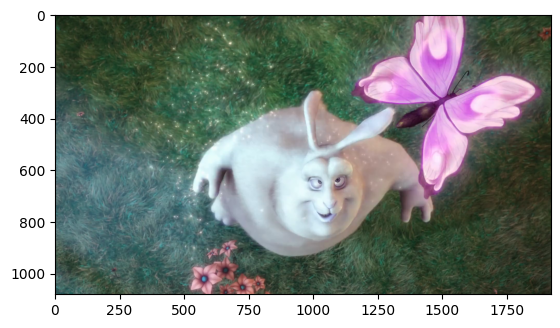

In [9]:
import cv2
import matplotlib.pyplot as plt



# Load the video
cap = cv2.VideoCapture("https://github.com/leandromoreira/digital_video_introduction/raw/master/v/small_bunny_1080p_30fps.mp4")

# Read the first frame
ret, frame = cap.read()

# Convert the frame to PNG format
cv2.imwrite("frame.png", frame, [cv2.IMWRITE_PNG_COMPRESSION, 0])

# Release the video capture
cap.release()
#mostra o frame capiturando
plt.imshow(frame)

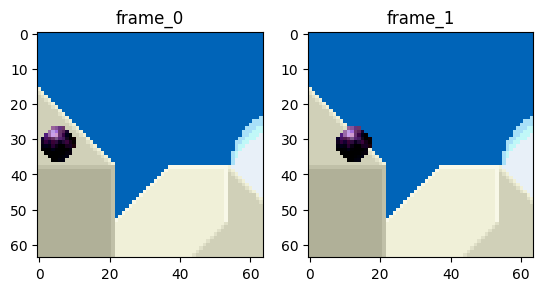

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
# loading the frames
frame_0 = mpimg.imread('smw_background_ball_1.png')
frame_1 = mpimg.imread('smw_background_ball_2.png')
# showing the frames
f, (plt1, plt2) = plt.subplots(1, 2)
plt1.set_title('frame_0');plt1.imshow(frame_0,interpolation='nearest');
plt2.set_title('frame_1');plt2.imshow(frame_1,interpolation='nearest');


# Prática: Veja os vetores de movimento
```bash
ffmpeg -debug vis_mb_type -i C:\Users\Achilles\Desktop\IFPB\TIC\small_bunny_1080p_30fps.mp4 C:\Users\Achilles\Desktop\IFPB\TIC\small_bunny_1080p_30fps_vis_mb.mp4
ffmpeg -i "C:\Users\Achilles\Desktop\IFPB\TIC\small_bunny_1080p_30fps.mp4" -vf "codecview=qp=true" -y "C:\Users\Achilles\Desktop\IFPB\TIC\small_bunny_1080p_30fps_debug.mp4"



In [11]:
import subprocess

# Command to execute
command = 'ffmpeg -i "C:\Users\Achilles\Desktop\IFPB\TIC\small_bunny_1080p_30fps.mp4" -vf "codecview=qp=true" -y "C:\Users\Achilles\Desktop\IFPB\TIC\small_bunny_1080p_30fps_debug.mp4"


# Execute the command as an administrator
subprocess.run(command, shell=True, check=True)


SyntaxError: unterminated string literal (detected at line 4) (3193185913.py, line 4)

# Quarto passo - quantização e codificação de entropia


82% of the coefficients were discarded.


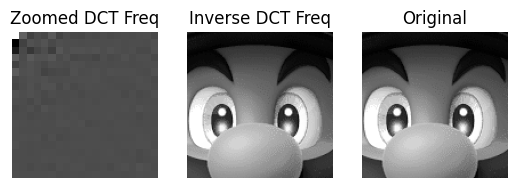

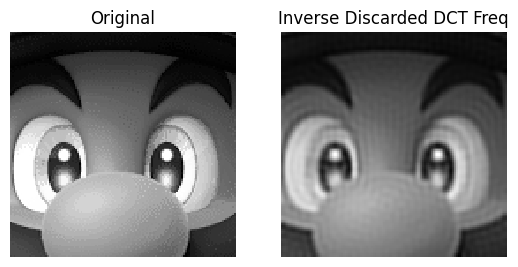

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
import matplotlib.image as mpimg

# loading image
img = mpimg.imread('super_mario_head.png')

choosen_y_x = 90
resolution = 128

# 128 x 128 slice (power of 2)
img_slice = img[choosen_y_x:(choosen_y_x + resolution), choosen_y_x:(choosen_y_x + resolution), 2]
# transform: 2D DCT
dct_slice = fftpack.dct(fftpack.dct(img_slice.T, norm='ortho').T, norm='ortho')
# inverse transform: 2D DCT
idct_slice = fftpack.idct(fftpack.idct(dct_slice.T, norm='ortho').T, norm='ortho')

f, (plt1, plt2, plt3) = plt.subplots(1, 3)

plt1.axis('off'); plt1.set_title('Zoomed DCT Freq'); plt1.imshow(dct_slice[0:20,0:20], cmap='gray', interpolation='nearest');
plt2.axis('off'); plt2.set_title('Inverse DCT Freq'); plt2.imshow(idct_slice, cmap='gray');
plt3.axis('off'); plt3.set_title('Original'); plt3.imshow(img_slice, cmap='gray');
# copying dct
dct_slice_copy = np.copy(dct_slice)

# only below the top left triangle to retain the lowest frequency
triangle = (50/100) * resolution

# only discard greater than threshold
threshold = 0.0019

discarded_coefficients = 0

for x in range(resolution):
    for y in range(resolution):
        if ((x +  y) > triangle) and (abs(dct_slice_copy[x, y]) > threshold):
            dct_slice_copy[x, y] = 0
            discarded_coefficients += 1

# 2D inverse DCT            
idct_slice = fftpack.idct(fftpack.idct(dct_slice_copy.T, norm='ortho').T, norm='ortho')

f, (plt1, plt2) = plt.subplots(1, 2)

plt1.axis('off'); plt1.set_title('Original'); plt1.imshow(img_slice, cmap='gray', interpolation='nearest')
plt2.axis('off'); plt2.set_title('Inverse Discarded DCT Freq'); plt2.imshow(idct_slice, cmap='gray', interpolation='nearest')


print("%d%% of the coefficients were discarded." % ((discarded_coefficients / (resolution*resolution)) * 100))

# Quinto passo - Codificando entropia
Depois de quantizarmos os dados (blocos/fatias/quadros de imagem), ainda podemos comprimi-los de forma lossless. Existem muitas maneiras (algoritmos) de comprimir dados. Vamos experimentar brevemente alguns deles, para uma compreensão mais profunda, você pode ler o incrível livro Understanding Compression: Data Compression for Modern Developers.

# Executar no terminal, como uso o windows, usei o git bash para executar o comando na propria pasta do arquivo
```bash
ffmpeg -i small_bunny_1080p_30fps.mp4 -b:v 964K -minrate 964K -maxrate 964K -bufsize 2000K  small_bunny_1080p_30fps_transrating_964.mp4


[Link para o vídeo](https://github.com/gasperpb/IFPB/blob/TIC/TIC/small_bunny_1080p_30fps_transrating_964.mp4)


# Sexto passo - formato bitstream
Depois de termos concluído todas essas etapas, precisamos empacotar os quadros comprimidos e o contexto dessas etapas. Precisamos informar explicitamente ao decodificador sobre as decisões tomadas pelo codificador, como profundidade de bits, espaço de cores, resolução, informações de previsões (vetores de movimento, direção de previsão intra), perfil, nível, taxa de quadros, tipo de quadro, número de quadros e muito mais.
```bash
ffmpeg -i small_bunny_1080p_30fps.mp4 -c:v libx264 -x264-params keyint=30:min-keyint=30:no-scenecut=1:no-cabac=1 -c:a copy small_bunny_1080p_30fps_h264_keyframe_each_second_CAVLC.mp4


# Prática: Inspecionar o H.264 bitstream
Podemos gerar um vídeo de um único quadro e usar o mediainfo para inspecionar seu bitstream H.264. Na verdade, você pode até ver o código fonte que analisa o bitstream h264 (AVC).


```bash
ffmpeg -i minimal.png -pix_fmt yuv420p minimal_yuv420.mp4

ffmpeg -i minimal.png  minimal_yuv444.mp4

# we can inspect h264 bitstream
mediainfo --Details minimal_yuv420.mp4  | less

# Todos os arquivos estão na pasta TIC do repositório do github
link https://github.com/gasperpb/IFPB/tree/TIC/TIC
